In [ ]:
import numpy as np 
import pandas as pd 

from IPython.display import display as displayDF



In [ ]:
FolderPath = "/content/drive/MyDrive/Colab Notebooks/PDU"
FilePath = FolderPath + "/FinalLabelDataAll.csv"
# /content/drive/MyDrive/Colab Notebooks/PDU/FinalLabelDataAll.csv
Raw_DB = pd.read_csv(FilePath)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (150,151,152) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
Raw_DB = Raw_DB.dropna(subset=['LABEL_SubActivity'])

for i in Raw_DB.columns:
  print(i)

Unnamed: 0
dt
wid
sid
recid
seqid
date
time
actcode
blockpos
bitdepth
deptbitv
md
tvd
logdepth
standdown
speedup
speeddown
rop
ropi
timeropi
hklda
hkldx
hkldpu
hkldso
woba
wobx
torqa
torqx
torqp
torqb
rpm
rpmm
totrpm
stppress
csgpress
mudflowine
mudflowin
mudflowoute
mudflowout
mudflowoutp
diffflow
klflow
muddensin
muddensout
mudtempin
mudtempout
mudcondin
mudcondout
mfiann
mfianne
surfrev
drillrev
reamrev
circrev
totrev
drilltime
reamtime
circtime
pumptime
rotatingtime
drilldist
stroke1
stroke2
stroke3
stroke4
totstks
totstksa
spm1
spm2
spm3
spm4
spm5
totspm
totspma
totpumpede
totpumpvol
totpumpvolan
totpumpedea
tankvoltot
tankvolact
tankvoltt
tankvolchgtot
tankvolchgact
tankvolchgtt
plbit
plstr
plann
plsurf
plmtr
plmwd
bithydpwr
bithydpwra
jif
jetvel
annveln
annvelx
ecddpt
ecdbit
ecdshoe
phydpwr
deptretm
lagstks
lagtime
dnhstroke
dnhtime
mse
doc
gas
dstrength
mseds
clcontent
in_slips
bht
scfm
airflin
airfline
airfloutp
airflout
airpress
airtemp
whp
wht
h2s1
h2s2
h2s3
h2s4
co21
co22
c

In [ ]:
import pycaret
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
# df.drop(columns=['B', 'C'])
dropped_list=["LABEL_ConnectionActivity",
"LABEL_SubActivity",
"Unnamed: 0",
"dt",
"wid",
"sid",
"recid",
"seqid",
"date",
"time",
"actcode",
"whp",
"wht",
"h2s1",
"h2s2",
"h2s3",
"h2s4",
"co21",
"co22",
"co23",
"co24",
"bitsize",
"foamrate",
"pwd_ecd",
"pwd_annpress",
"pwd_intpress",
"pwd_depth",
"pwd_tvd",
"pwd_bht",
"spare_1",
"spare_2",
"spare_3",
"spare_4",
"spare_5",
"spare_6",
"spare_7",
"spare_8",
"spare_9",
"spare_10",
"label"]
from pycaret.classification import *
exp_mclf101 = setup(data = Raw_DB.drop(columns=dropped_list),
                    target = 'LABEL_Activity',
                    normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.85,
                    session_id=123)

,Description,Value
0,session_id,123
1,Target,LABEL_Activity
2,Target Type,Multiclass
3,Label Encoded,"Cementing Job: 0, Circulate Hole Cleaning: 1, ..."
4,Original Data,"(424035, 113)"
5,Missing Values,False
6,Numeric Features,110
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9992,1.0000,0.9975,0.9992,0.9992,0.9991,0.9991,42.206
et,Extra Trees Classifier,0.9992,0.9999,0.9974,0.9992,0.9992,0.9990,0.9990,23.394
dt,Decision Tree Classifier,0.9983,0.9991,0.9952,0.9983,0.9983,0.9979,0.9979,3.139
knn,K Neighbors Classifier,0.9932,0.9991,0.9866,0.9932,0.9932,0.9916,0.9916,13.154
svm,SVM - Linear Kernel,0.7751,0.0000,0.6677,0.7742,0.7684,0.7185,0.7199,7.303
lda,Linear Discriminant Analysis,0.7123,0.9523,0.6613,0.7409,0.7149,0.6456,0.6468,1.761
ridge,Ridge Classifier,0.6683,0.0000,0.2668,0.6259,0.6157,0.5722,0.5786,0.307
nb,Naive Bayes,0.5625,0.9050,0.6818,0.6481,0.5476,0.4806,0.4967,0.470
ada,Ada Boost Classifier,0.4928,0.5866,0.1466,0.4005,0.4017,0.3252,0.3761,23.237
lightgbm,Light Gradient Boosting Machine,0.4017,0.6369,0.1640,0.4420,0.3670,0.2487,0.2630,43.594


In [ ]:
rf = create_model('rf')
dt = create_model('dt')
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9927,0.9991,0.9829,0.9927,0.9927,0.9909,0.9909
1,0.9930,0.9988,0.9832,0.9930,0.9930,0.9913,0.9913
2,0.9937,0.9991,0.9842,0.9937,0.9937,0.9921,0.9921
3,0.9934,0.9991,0.9898,0.9934,0.9934,0.9917,0.9917
4,0.9933,0.9991,0.9907,0.9933,0.9933,0.9916,0.9916
5,0.9933,0.9992,0.9836,0.9933,0.9933,0.9916,0.9916
6,0.9932,0.9992,0.9804,0.9932,0.9932,0.9915,0.9915
7,0.9931,0.9992,0.9901,0.9931,0.9931,0.9914,0.9914
8,0.9934,0.9993,0.9911,0.9934,0.9934,0.9918,0.9918
9,0.9932,0.9994,0.9894,0.9932,0.9932,0.9916,0.9916


In [ ]:
tuned_dt = tune_model(dt, optimize = 'F1')
tuned_rf = tune_model(rf, optimize = 'F1')
tuned_knn = tune_model(knn, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9956,0.9997,0.9863,0.9956,0.9956,0.9946,0.9946
1,0.9954,0.9997,0.9912,0.9954,0.9954,0.9942,0.9942
2,0.9963,0.9997,0.9948,0.9963,0.9963,0.9954,0.9954
3,0.9960,0.9997,0.9950,0.9960,0.9960,0.9951,0.9951
4,0.9964,0.9997,0.9938,0.9964,0.9964,0.9955,0.9955
5,0.9964,0.9998,0.9946,0.9964,0.9964,0.9955,0.9955
6,0.9968,0.9999,0.9883,0.9968,0.9968,0.9960,0.9960
7,0.9962,0.9998,0.9934,0.9962,0.9962,0.9952,0.9952
8,0.9966,0.9997,0.9964,0.9966,0.9966,0.9958,0.9958
9,0.9965,0.9999,0.9942,0.9965,0.9965,0.9956,0.9956


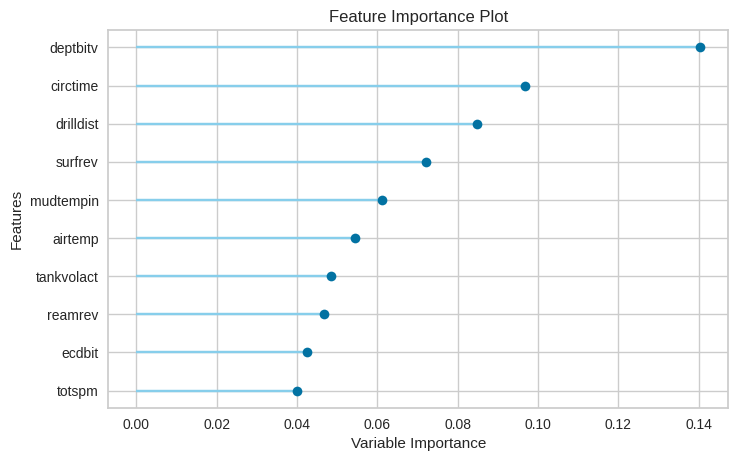

In [ ]:
plot_model(tuned_rf, plot='feature')

In [ ]:
print(tuned_dt)
print(tuned_rf)
print(tuned_knn)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
KNeighborsClassi